In [9]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plot_fun import subplot_results

### Settings

In [10]:
N = 4 # runs
Kx = [[16]] # Step
Kb = [[2]] # Polynomial
epochs = 100
refinement_epochs = 100
lvls = [-1, 1]
s_on_f_model = ScalarOnFunctionModel(Kx=Kx[0], Kb= Kb[0])

### Continuous

In [11]:
optimizer_s_on_f = CordexContinuous(model=s_on_f_model, runs=N)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:01<00:00, 66.86it/s]


Best objective value (A): 8.43


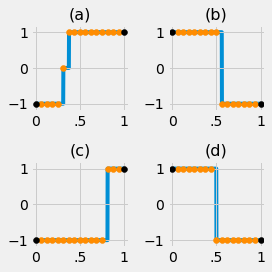

In [12]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

### Discrete

In [13]:
optimizer_s_on_f = CordexDiscrete(model=s_on_f_model, runs=N, levels=lvls)
best_design_s_on_f, best_objective_value_s_on_f = optimizer_s_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 272.26it/s]


Best objective value (A): 8.45


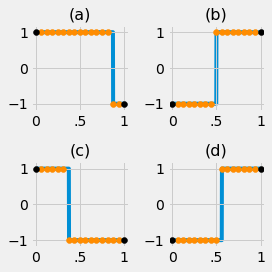

In [14]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_s_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_s_on_f,2)}')

### NBDO